In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from decimal import Decimal
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import ConnectionPatch
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import seaborn as sns
import os
from matplotlib.ticker import FuncFormatter
color_sns = sns.cubehelix_palette(10, start=.5, rot=-.75)

In [34]:
path = os.getcwd()
base = path.split('/')[:-2]
base_path = '/'.join(base)+'/benchmark/arrow_bench/'

In [35]:
cpu_ratio = []

In [36]:
from matplotlib.patches import ConnectionPatch
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
category_colors = [color_sns[5],color_sns[3],color_sns[1],'sandybrown','peachpuff']
def plot_filter_bar(sync_dict, sync_delta, sync_FOR, sync_LECO, IO_dict, IO_delta, IO_FOR, IO_LECO, titlename,withylabel, withxlabel):
    selectivity = [0.001, 0.01, 0.1, 1, 10]
    X = np.arange(len(selectivity))+1
    fig, ax = plt.subplots(figsize=(5, 2.8),edgecolor='black')
    bar_width = 0.24
    plt.bar(X-0.36, np.array(sync_dict)-np.array(IO_dict),bottom=IO_dict, label = "Default_CPU",width = bar_width, color = color_sns[7], hatch='//',ec=color_sns[9])
    plt.bar(X-0.36, IO_dict, label = "Default_IO",width = bar_width, color = color_sns[6],ec=color_sns[7])
    plt.bar(X-0.12, sync_delta-IO_delta,bottom=IO_delta, label = "Delta_CPU",width = bar_width, color = color_sns[5], hatch='//',ec=color_sns[6])
    plt.bar(X-0.12, IO_delta, label = "Delta_IO",width = bar_width, color = color_sns[4],ec=color_sns[5])
    plt.bar(X+0.12, sync_FOR-IO_FOR,bottom=IO_FOR, label = "FOR_CPU",width = bar_width, color = color_sns[3], hatch='\\\\',ec=color_sns[4])
    plt.bar(X+0.12, IO_FOR, label = "FOR_IO" ,width = bar_width,  color = color_sns[1], ec=color_sns[2])
    plt.bar(X+0.36, sync_LECO-IO_LECO,bottom=IO_LECO, label = "LeCo_CPU",width = bar_width, color = category_colors[-2], hatch='//',ec='chocolate')
    plt.bar(X+0.36, IO_LECO, label = "LeCo_IO",width = bar_width, color = category_colors[-1],ec=category_colors[-2])
    if 'normal' in titlename or 'books' in titlename:
        plt.ylim(0, max(sync_delta)+0.4)
        ymajorLocator = MultipleLocator(0.5)
        plt.gca().yaxis.set_major_locator(ymajorLocator)
    else:
        plt.ylim(0, 2.1)
        ymajorLocator = MultipleLocator(0.5)
        plt.gca().yaxis.set_major_locator(ymajorLocator)
    if 'normal' in titlename:
        plt.legend(fontsize=9.9,ncol=3,borderaxespad = 0.1, loc=2,frameon=False)
        plt.ylim(0, max(sync_delta)+0.7)
    plt.xticks(X, selectivity,fontsize=12)
    plt.yticks(fontsize=10)
    if withxlabel:
        plt.xlabel("selectivity(%)", fontsize = 14)
    if withylabel:
        plt.ylabel("Query Time(s)", fontsize = 14)
   
    plt.title(titlename, fontsize = 17)
    plt.tight_layout()
    plt.savefig('parquet_aggsum_{}.pdf'.format(titlename),dpi=500, transparent=False)
    plt.show()

In [37]:
df2 = pd.read_csv(base_path+'parquet_aggsum_result.log',delimiter=' ',header=None)

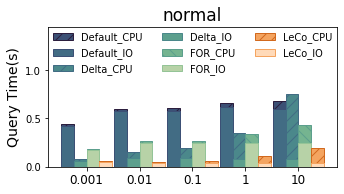

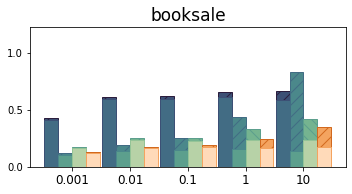

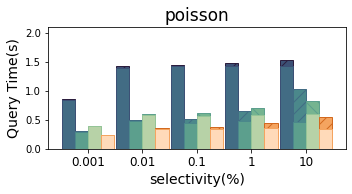

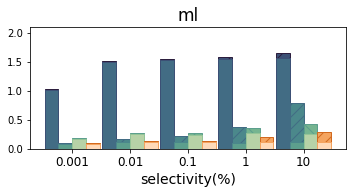

In [38]:
method_num=4
datasets = ["normal","booksale","poisson", "ml"]
x_ = [0,0,1,1]
y_ = [1,0,1,0]
memory = ['10G','6G']
selectivity = ['1e-05','0.0001','0.001','0.01','0.1']
for i in range(len(datasets)):
    for mem in range(len(memory)):
        result = df2.iloc[i*len(selectivity)*len(memory)*method_num + mem * len(selectivity)*method_num: i*len(selectivity)*len(memory)*method_num + mem * len(selectivity)*method_num + len(selectivity)*method_num]     
        if mem ==0:
            if i ==0 or i==1:
                plot_filter_bar(result[result[0]==0][1], result[result[0]==12][1], result[result[0]==10][1], result[result[0]==11][1], result[result[0]==0][2], result[result[0]==12][2], result[result[0]==10][2], result[result[0]==11][2],datasets[i],y_[i],x_[i])
            else:
                plot_filter_bar(result[result[0]==0][1], result[result[0]==12][1], result[result[0]==10][1], result[result[0]==11][1], result[result[0]==0][2], result[result[0]==12][2], result[result[0]==10][2], result[result[0]==11][2],datasets[i],y_[i],x_[i])
    
            
            

In [39]:
df = pd.read_csv(base_path+'parquet_filter_groupby_clean.log'.format(phrase),delimiter=' ',header=None)

In [40]:
memory = ['10G']
selectivity = ['0.001','0.01','0.1','1','10']
mem_result = {}
for mem in range(len(memory)):
    result = df.iloc[len(selectivity)*mem*4 : len(selectivity)*(mem+1)*4,: ]
    mem_result[mem] = result
    

In [41]:
df2 = pd.read_csv(base_path+'parquet_filter_groupby_sensor_clean.log'.format(phrase),delimiter=' ',header=None)

In [42]:
memory = ['10G']
selectivity = ['0.001','0.01','0.1','1','10']
mem_result2 = {}
for mem in range(len(memory)):
    result = df2.iloc[len(selectivity)*mem*4 : len(selectivity)*(mem+1)*4,: ]
    mem_result2[mem] = result
    

In [43]:
from matplotlib.patches import ConnectionPatch
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
category_colors = [color_sns[5],color_sns[3],color_sns[1],'saddlebrown','chocolate','sandybrown','peachpuff']
def plot_filter_bar(result, result2, titlename,withylabel, withxlabel):
    fig,axs=plt.subplots(2, 1,figsize=(8,4.2),sharex=True,sharey=False)
    selectivity = ['0.001','0.01','0.1','1','10']
    X = np.arange(len(selectivity))+1
#     fig, ax = plt.subplots(figsize=(8, 3.3))
    bar_width = 0.2
    for i in range(2):
        
        axs[i].bar(X-0.3, result[result[0]==0][6],bottom=result[result[0]==0][5] + result[result[0]==0][4], label = "Default_groupby_CPU",width = bar_width, color = color_sns[8], hatch='//',ec=color_sns[9])
        axs[i].bar(X-0.3, result[result[0]==0][5], bottom=result[result[0]==0][4], label = "Default_filter_CPU",width = bar_width, color = color_sns[7],ec=color_sns[8], hatch='\\\\')
        axs[i].bar(X-0.3, result[result[0]==0][4], label = "Default_IO",width = bar_width, color = color_sns[6],ec=color_sns[7])

        axs[i].bar(X-0.1, result[result[0]==12][6],bottom=result[result[0]==12][5] + result[result[0]==12][4], label = "Delta_groupby_CPU",width = bar_width,  color = color_sns[5], hatch='\\\\',ec=color_sns[6])
        axs[i].bar(X-0.1, result[result[0]==12][5], bottom=result[result[0]==12][4], label = "Delta_filter_CPU",width = bar_width, color = color_sns[4],ec=color_sns[5], hatch='//')
        axs[i].bar(X-0.1, result[result[0]==12][4], label = "Delta_IO",width = bar_width,color = color_sns[3],ec=color_sns[4])

        axs[i].bar(X+0.1, result[result[0]==10][6],bottom=result[result[0]==10][5] + result[result[0]==10][4], label = "FOR_groupby_CPU",width = bar_width,  color = color_sns[3], hatch='//',ec=color_sns[4])
        axs[i].bar(X+0.1, result[result[0]==10][5], bottom=result[result[0]==10][4], label = "FOR_filter_CPU",width = bar_width, color = color_sns[1],ec=color_sns[2], hatch='\\\\')
        axs[i].bar(X+0.1, result[result[0]==10][4], label = "FOR_IO",width = bar_width,color = color_sns[0],ec=color_sns[1])

        axs[i].bar(X+0.3, result[result[0]==11][6],bottom=result[result[0]==11][5] + result[result[0]==11][4], label = "LeCo_groupby_CPU",width = bar_width,color = category_colors[-3], hatch='\\\\',ec=category_colors[-4])
        axs[i].bar(X+0.3, result[result[0]==11][5], bottom=result[result[0]==11][4], label = "LeCo_filter_CPU",width = bar_width,color = category_colors[-2],ec=category_colors[-3], hatch='//')
        axs[i].bar(X+0.3, result[result[0]==11][4], label = "LeCo_IO",width = bar_width,color = category_colors[-1],ec=category_colors[-2])
        for j in range(len(selectivity)):
            axs[i].text(X[j]-0.44, float(np.array(result[result[0]==0][3])[j])+0.6, str(round(float(np.array(result[result[0]==0][3])[j])/ float(np.array(result[result[0]==11][3])[j]),1))+'x',fontsize=16.5)
        for j in range(len(selectivity)):
            axs[i].text(X[j]-0.2, float(np.array(result[result[0]==12][3])[j])+0.1, str(round(float(np.array(result[result[0]==12][3])[j])/ float(np.array(result[result[0]==11][3])[j]),1))+'x',fontsize=16.5)
        for j in range(len(selectivity)):
            axs[i].text(X[j], float(np.array(result[result[0]==10][3])[j])+0.22, str(round(float(np.array(result[result[0]==10][3])[j])/ float(np.array(result[result[0]==11][3])[j]),1))+'x',fontsize=16.5)

        result = result2

    lines, labels = fig.axes[-1].get_legend_handles_labels()
    axs[0].set_ylim(0, 10)
    axs[1].set_ylim(0, 10)
    fig.legend( lines, labels,           
            fontsize=12,ncol=1,bbox_to_anchor=(1.31,1,-0.02,-0.08),borderaxespad = 0.)

    axs[0].set_xticks(X, selectivity,fontsize=13)
    axs[1].set_xticks(X, selectivity,fontsize=13)
    if withxlabel:
        plt.xlabel("Selectivity(%)", fontsize = 16)
    if withylabel:
        axs[0].set_ylabel("Query Time(s)", fontsize = 16)
        axs[1].set_ylabel("Query Time(s)", fontsize = 16)
    plt.title('correlated', fontsize = 14.5)
    axs[0].set_title('random', fontsize = 14.5)
    plt.subplots_adjust(wspace =0, hspace =0)
    plt.tight_layout()
    plt.savefig('parquet_filter_aggsum_{}.pdf'.format(titlename),dpi=500, transparent=True,bbox_inches="tight")
    plt.show()

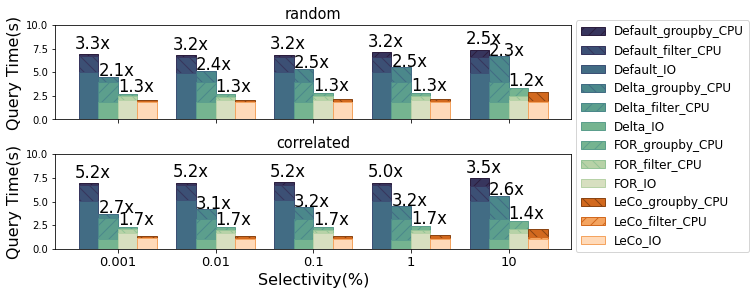

In [44]:
for mem in range(len(memory)):
    tmp = mem_result[mem]
    tmp2= mem_result2[mem]
    plot_filter_bar(tmp, tmp2,'with_order', 1, 1)
    break
    